In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from __future__ import print_function
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

from jira import JIRA

from jira_graph.util import get_issue_blocks
from jira_graph.util import get_issue_styling
from config import *

jira = JIRA(JIRA_OPTS, basic_auth=JIRA_AUTH)

In [2]:
# Define the initial issue key that we want to start enumerating from
START_ISSUE = 'DO-2356'

# Lookup the initial issue
initial_issue = jira.issue(START_ISSUE)

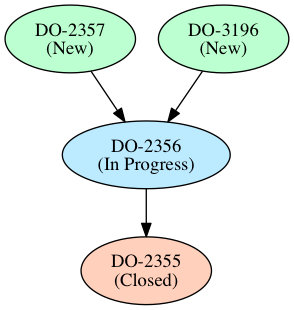

In [3]:
# Create a directed graph
graph = nx.DiGraph()

# Add the initial issue
graph.add_node(initial_issue.id, **get_issue_styling(initial_issue))

# Enumerate blocked & blockers
blocks, blockers = get_issue_blocks(initial_issue)

# Add the blocked & blockers to the graph
for b in blocks:
    graph.add_node(b.id, **get_issue_styling(b))
    graph.add_edge(b.id, initial_issue.id)
for b in blockers:
    graph.add_node(b.id, **get_issue_styling(b))
    graph.add_edge(initial_issue.id, b.id)

draw(graph)